# Google Analytics Revenue Prediction

## EDA

**Environment**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
 
# Make jupyter bigger
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

In [2]:
from myfunctions import *

**Import Dataframe**

In [3]:
df = pd.read_csv("data/df3.csv", low_memory=False)

In [4]:
df.head()

,channelGrouping,date,fullVisitorId,visitNumber,visitStartTime,deviceBrowser,deviceCategory,deviceIsMobile,deviceOS,geoCity,geoContinent,geoCountry,geoMetro,geoDomain,geoRegion,geoSubContinent,totalsBounces,totalsHits,totalsNewVisits,totalsPageviews,trafficSourceAdContent,adwordsClickAdNetworkType,adwordsClickGclId,adwordsClickInfoPage,adwordsClickInfoSlot,trafficSourceCampaign,trafficSourceIsTrueDirect,trafficSourceKeyword,trafficSourceMedium,trafficSourceReferralPath,trafficSourceSource,totalsTransactionRevenue
0,Organic Search,2016-09-02,1131660440785968503,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,Unknown,ttnet.com.tr,Izmir,Western Asia,1.0,1,1.0,1.0,NoAd,NoAdWords,0,0.0,NaN,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0
1,Organic Search,2016-09-02,377306020877927890,1,1472880147,Firefox,desktop,False,Macintosh,Unknown,Oceania,Australia,Unknown,dodo.net.au,Unknown,Australasia,1.0,1,1.0,1.0,NoAd,NoAdWords,0,0.0,NaN,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0
2,Organic Search,2016-09-02,3895546263509774583,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,Unknown,Unknown,Community of Madrid,Southern Europe,1.0,1,1.0,1.0,NoAd,NoAdWords,0,0.0,NaN,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0
3,Organic Search,2016-09-02,4763447161404445595,1,1472881213,UC Browser,desktop,False,Linux,Unknown,Asia,Indonesia,Unknown,Unknown,Unknown,Southeast Asia,1.0,1,1.0,1.0,NoAd,NoAdWords,0,0.0,NaN,NoCampaign,False,google + online,organic,NoReferral,google,0.0
4,Organic Search,2016-09-02,27294437909732085,2,1472822600,Chrome,mobile,True,Android,Unknown,Europe,United Kingdom,Unknown,Unknown,Unknown,Northern Europe,1.0,1,0.0,1.0,NoAd,NoAdWords,0,0.0,NaN,NoCampaign,True,NoKeyword,organic,NoReferral,google,0.0


### EDA NUMERICAL

Subsetting the dataframe with the numerical vars

In [5]:
df_num = df[['totalsTransactionRevenue','totalsHits','totalsPageviews','adwordsClickInfoPage']]

In [6]:
df_num.head()

,totalsTransactionRevenue,totalsHits,totalsPageviews,adwordsClickInfoPage
0,0.0,1,1.0,0.0
1,0.0,1,1.0,0.0
2,0.0,1,1.0,0.0
3,0.0,1,1.0,0.0
4,0.0,1,1.0,0.0


In [7]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
totalsTransactionRevenue,903553.0,1.704461e+06,5.278158e+07,0.0,0.0,0.0,0.0,2.312950e+10
totalsHits,903553.0,4.596866e+00,9.641905e+00,1.0,1.0,2.0,4.0,5.000000e+02
totalsPageviews,903553.0,3.849764e+00,7.025274e+00,1.0,1.0,1.0,4.0,4.690000e+02
adwordsClickInfoPage,903553.0,2.394326e-02,1.558196e-01,0.0,0.0,0.0,0.0,1.400000e+01


#### TARGET VAR: totalsTransactionRevenue

The target is a var called **totalsTransactionRevenue** wich is the exponential of the revenue in dollars.

In the distribution we see there are many 0: 'No Buy' and different Numerical values for the logarith of the amout.

In [8]:
df.totalsTransactionRevenue.value_counts().head()

0.0           892038
16990000.0       256
18990000.0       189
33590000.0       187
44790000.0       170
Name: totalsTransactionRevenue, dtype: int64

Numbers of Nulls:  0
The description of this variable is:
 count    9.035530e+05
mean     1.704461e+06
std      5.278158e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.312950e+10
Name: totalsTransactionRevenue, dtype: float64


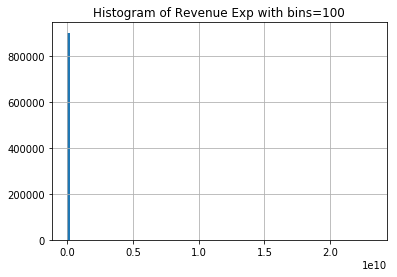

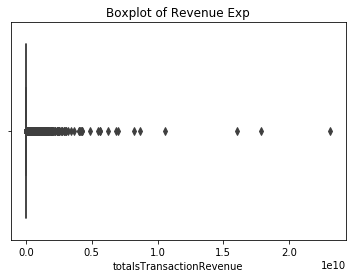

In [9]:
desc_num(df['totalsTransactionRevenue'],100, 'Revenue Exp')

I'll review the distribution of the positive values of the column

Numbers of Nulls:  0
The description of this variable is:
 count    1.151500e+04
mean     1.337448e+08
std      4.482852e+08
min      1.000000e+04
25%      2.493000e+07
50%      4.945000e+07
75%      1.076550e+08
max      2.312950e+10
Name: totalsTransactionRevenue, dtype: float64


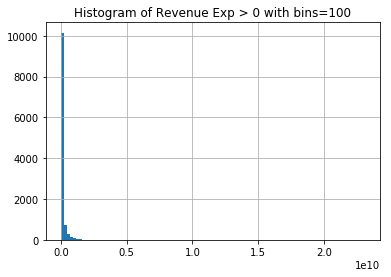

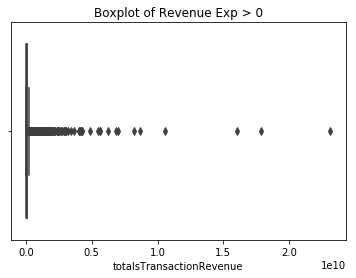

In [10]:
desc_num(df['totalsTransactionRevenue'].loc[df['totalsTransactionRevenue']>0],100, 'Revenue Exp > 0')

The distributions seams very right skeewed, and very unbalances.

I will create 2 new columns:
* the column with the dollar revenues (log)
* the column with boolean Buy, NotBuy

In [11]:
df['totalsTransactionRevenueDoll'] = df['totalsTransactionRevenue'].apply(lambda x: math.log(x) if x>0 else 0)

Numbers of Nulls:  0
The description of this variable is:
 count    11515.000000
mean        17.823362
std          1.202494
min          9.210340
25%         17.031582
50%         17.716473
75%         18.494442
max         23.864375
Name: totalsTransactionRevenueDoll, dtype: float64


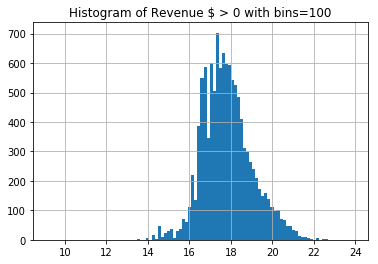

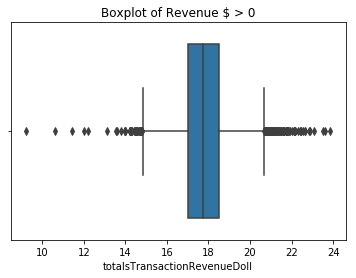

In [12]:
desc_num(df['totalsTransactionRevenueDoll'].loc[df['totalsTransactionRevenueDoll']>0],100,'Revenue $ > 0')


In [13]:
df['totalsIsTransaction'] = df['totalsTransactionRevenue'].apply(lambda x: True if x>0 else False)

In [14]:
df['totalsIsTransaction'].value_counts()

False    892038
True      11515
Name: totalsIsTransaction, dtype: int64

In [15]:
buy = df.groupby('totalsIsTransaction')['channelGrouping'].count().reset_index()
buy.columns = ['transaction','count']

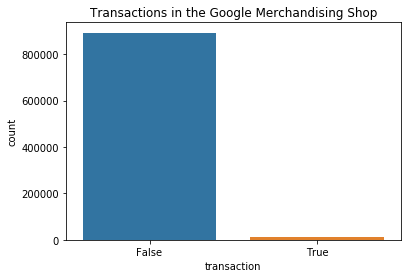

In [16]:
sns.barplot(x='transaction', y='count', data=buy)
plt.title('Transactions in the Google Merchandising Shop')
plt.show()

#### totalsHits 

Numbers of Nulls:  0
The description of this variable is:
 count    903553.000000
mean          4.596866
std           9.641905
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         500.000000
Name: totalsHits, dtype: float64


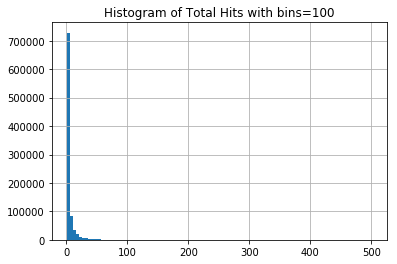

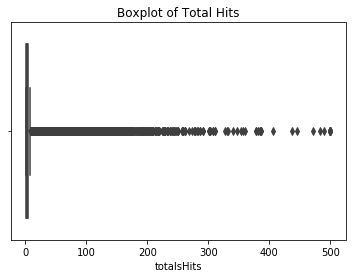

In [21]:
desc_num(df['totalsHits'], 100, 'Total Hits')

In [32]:
hits = df.groupby('totalsHits')['channelGrouping'].count().reset_index()
hits.columns = ['Hits','count']

In [39]:
hits.sort_values(by='Hits', ascending=False).head()

,Hits,count
273,500,10
272,489,1
271,483,1
270,471,1
269,445,1


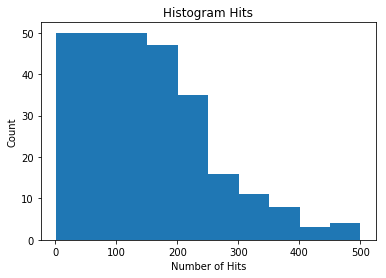

In [68]:
plt.hist(hits['Hits'])
plt.title('Histogram Hits')
plt.xlabel('Number of Hits')
plt.ylabel('Count')
plt.show()


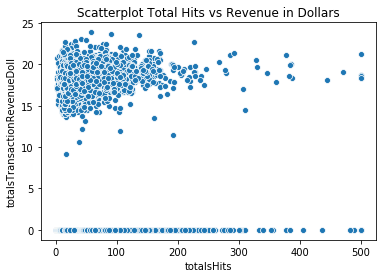

In [49]:
ax = sns.scatterplot(x='totalsHits', y='totalsTransactionRevenueDoll', data=df)
ax.set_title('Scatterplot Total Hits vs Revenue in Dollars')
plt.show()

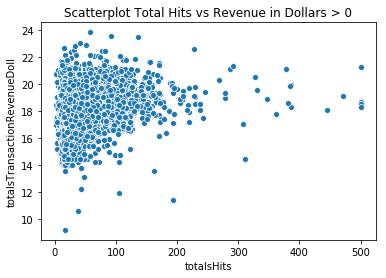

In [52]:
ax = sns.scatterplot(x='totalsHits', y='totalsTransactionRevenueDoll', data=df.loc[df['totalsTransactionRevenueDoll']>0])
ax.set_title('Scatterplot Total Hits vs Revenue in Dollars > 0')
plt.show()

Eventhough this var semms to have many outliers, after reviewing the data, the visits seam real, so I keep them.